# Step 0

Importing the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

# Step 1

Import the online dataset that contains Airbnb data on New York City

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

To see if the dataset is readed in a correct way we print the first 5 elements in the data set using head(5)

In [3]:
df_raw.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Step 2

We are using this notebook to find patterns and valuable information as much as we can. We are going to make graphs that helps us understand the patterns found, get some statistics, create new variables if needed, etc.

* What can we learn about different hosts and areas?
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

## First steps: Knowing a little more about the dataset

In [4]:
# Shape
print("The data set has ",df_raw.shape[0], " rows and ",df_raw.shape[1]," columns." )

The data set has  48895  rows and  16  columns.


In [5]:
# Information
print("Information: ")
df_raw.info()

Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review       

In [6]:
print("The amount of categorical columns is: ", len(df_raw.select_dtypes(include="O").columns))
print("The amount of numerical columns is: ", len(df_raw.columns)-len(df_raw.select_dtypes(include="O").columns))

The amount of categorical columns is:  6
The amount of numerical columns is:  10


### Descriptive Statistics of the data set

In [7]:
print("####### Numerical values  #######")
round(df_raw.describe().transpose())

####### Numerical values  #######


,count,mean,std,min,25%,50%,75%,max
id,48895.0,19017143.0,10983108.0,2539.0,9471945.0,19677284.0,29152178.0,36487245.0
host_id,48895.0,67620011.0,78610967.0,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
latitude,48895.0,41.0,0.0,40.0,41.0,41.0,41.0,41.0
longitude,48895.0,-74.0,0.0,-74.0,-74.0,-74.0,-74.0,-74.0
price,48895.0,153.0,240.0,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.0,21.0,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.0,45.0,0.0,1.0,5.0,24.0,629.0
reviews_per_month,38843.0,1.0,2.0,0.0,0.0,1.0,2.0,58.0
calculated_host_listings_count,48895.0,7.0,33.0,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,113.0,132.0,0.0,0.0,45.0,227.0,365.0


In [8]:
print("####### Categorical values  #######")
df_raw.describe(include="O").transpose()

####### Categorical values  #######


,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


In [9]:
# Duplicated values
print("¿Exist duplicated values? ",df_raw.duplicated().any())

¿Exist duplicated values?  False


In [10]:
# Unique values
df_raw.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**From this first review we can say that:**
*   The data types seems to be fine, except for the type in column last_review, it should be date type.
*   The columns last_review, reviews_per_month, host_name, and name has null values.
* The data set doesn't contains duplicated entries.
* There are prices equal to 0.
* There are properties with availability_365 of 0.



## Null values
How many null values exist in the data set?

In [11]:
print("Total null values in each column: ")
print(df_raw.isnull().sum().sort_values(ascending=False))

Total null values in each column: 
last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [12]:
# what porcentage the null values represent over total data
print("Percentage of null values in each column: ")
print(df_raw.isnull().sum().sort_values(ascending=False)/len(df_raw)*100)

Percentage of null values in each column: 
last_review                       20.558339
reviews_per_month                 20.558339
host_name                          0.042949
name                               0.032723
id                                 0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


It's possible that the missing values are due to the fact that there is no reviews for the listing. To check this we can search in the data set if any of this missing registers has a value grater than 0 in the column number_of_reviews.

In [13]:
print("Number of registers with null values in reviews_per_month and more than cero reviews in number_of_reviews: ",len(df_raw.loc[(df_raw['reviews_per_month'].isnull()==True) & (df_raw['number_of_reviews']>0)]))

Number of registers with null values in reviews_per_month and more than cero reviews in number_of_reviews:  0


Now we are sure that the missing reviews_per_month values has the value of 0.

## Visualizing the data

Before starting with the data visualization I will remove from the data set some information not relevant as name, host_name, id and last_review, and replace the null values in reviews_per_month with 0.

In [14]:
df = df_raw.copy()

In [15]:
# Deleting non relevant columns
df.drop(['id','host_name', 'name', 'last_review'], axis=1, inplace=True)

In [16]:
# Replace null values in reviews_per_month with 0.
df['reviews_per_month'].fillna(0.0, inplace=True)

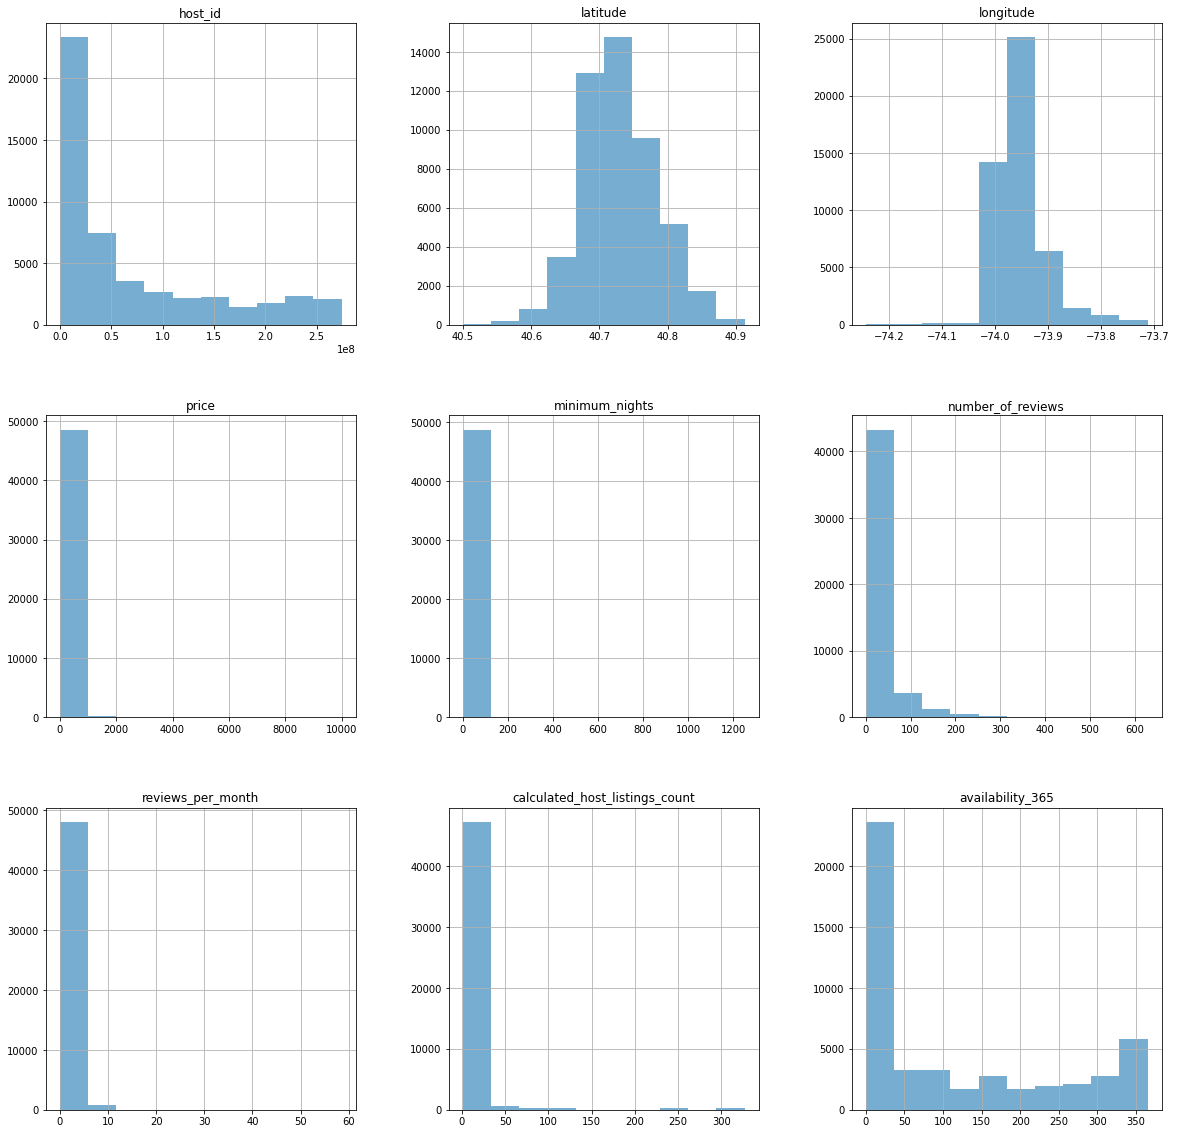

In [17]:
# Data distribution
df.hist(figsize=(20,20),alpha=0.6)
plt.show()

* We can observe that the values for price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count and availability_365 are in big majority acummulated over the left side of the plot, indicating an asymetric distrubution with  a left skew.

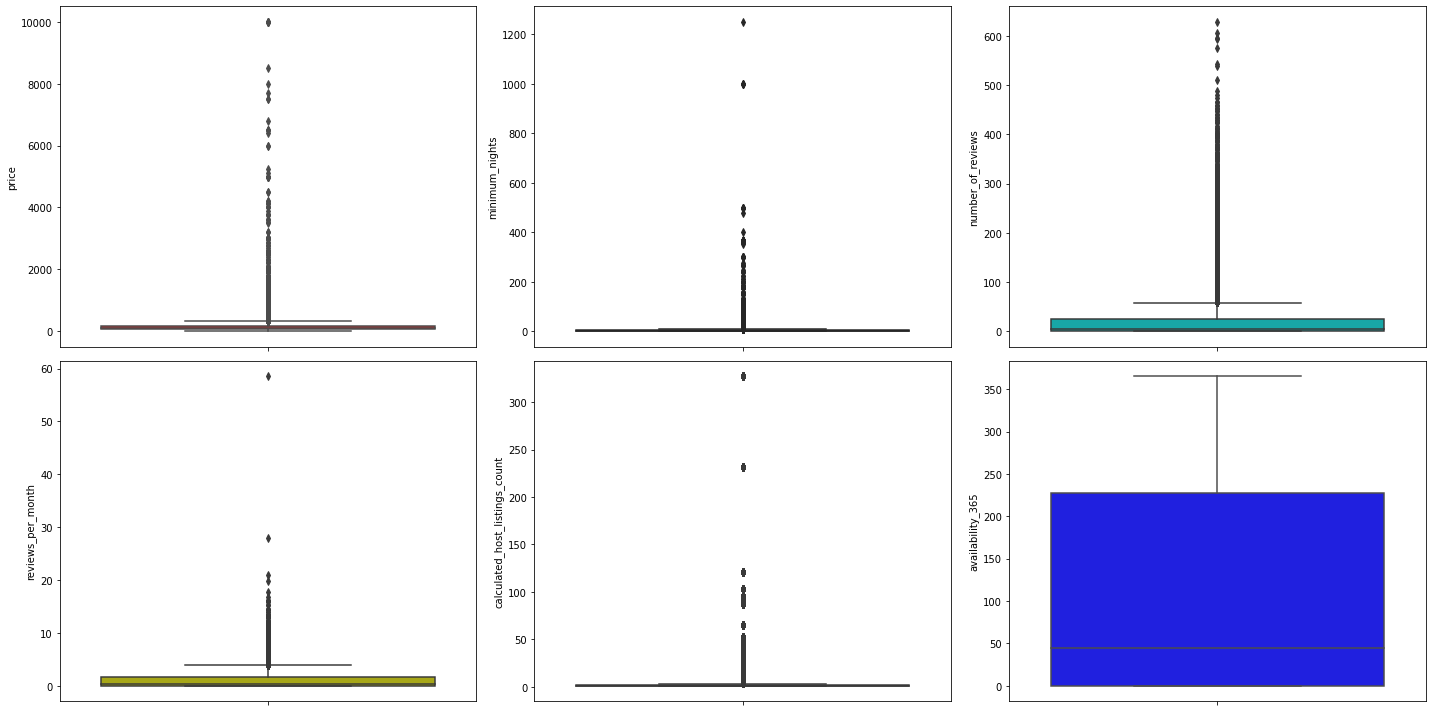

In [18]:
#Box plots for the right skewed columns
f, ax = plt.subplots(2,3, figsize=(20,10))

sns.boxplot(y = df['price'], ax=ax[0,0], color='r') 

sns.boxplot(y = df['minimum_nights'], ax=ax[0,1], color='g')

sns.boxplot(y = df['number_of_reviews'], ax=ax[0,2], color='c')

sns.boxplot(y = df['reviews_per_month'], ax=ax[1,0], color='y')

sns.boxplot(y = df['calculated_host_listings_count'], ax=ax[1,1], color='m')

sns.boxplot(y = df['availability_365'], ax=ax[1,2], color='b')

plt.tight_layout()

plt.draw()

* From this plots we see that the data is asymmetric and left skew. We also observe that are severals outliers in the columns except in availability_365.

As for the outlier we can investigate a little more about those values:

In [19]:
# Using the IQR method in price values
price_stat = df['price'].describe()
print(price_stat)
IQR = price_stat['75%']-price_stat['25%']
upper = price_stat['75%'] + 1.5*IQR
lower = price_stat['25%'] - 1.5*IQR
print('In the price case the upper & lower for bounds for suspected outliers are {} and {}.'.format(upper,lower))

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
In the price case the upper & lower for bounds for suspected outliers are 334.0 and -90.0.


In [20]:
df[df['price'] > 334.0].count()

host_id                           2972
neighbourhood_group               2972
neighbourhood                     2972
latitude                          2972
longitude                         2972
room_type                         2972
price                             2972
minimum_nights                    2972
number_of_reviews                 2972
reviews_per_month                 2972
calculated_host_listings_count    2972
availability_365                  2972
dtype: int64

Using the IQR to create boundaries in this case doesn't help us much, so we are going to use de Z score method in order to get a better appreciation of the outliers.

In [21]:
# Adding a new column with the zscore values for the existing columns
cols=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_zscore=df.copy()
for col in cols:
    col_zscore = col + '_zscore'
    df_zscore[col_zscore] = stats.zscore(df_zscore[col])

In [22]:
# Price outliers evaluation
df_zscore.sort_values(by = 'price_zscore', ascending=False).head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_zscore,minimum_nights_zscore,number_of_reviews_zscore,reviews_per_month_zscore,calculated_host_listings_count_zscore
9151,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,41.004410,4.532838,-0.477540,-0.657943,-0.186451
17692,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,41.004410,-0.098973,-0.410200,-0.582814,-0.186451
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,41.004410,1.119925,-0.522433,-0.682986,-0.186451
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365,41.000246,1.119925,-0.522433,-0.682986,-0.186451
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,41.000246,4.484082,-0.387753,-0.595336,-0.186451
6530,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0,41.000246,-0.098973,-0.499987,-0.670464,-0.186451
30268,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251,34.758358,1.119925,-0.477540,-0.570293,-0.186451
4377,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365,32.676341,-0.293996,-0.499987,-0.664203,0.117019
29662,156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146,31.439623,-0.293996,-0.522433,-0.682986,0.147366
42523,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364,30.594324,-0.293996,-0.522433,-0.682986,-0.186451


We can observe a bigger gap in z-score for prices greater or equal than 9999.

In [23]:
df[df['price'] >= 9999]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6530,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
9151,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
17692,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365


Here we couldn't appreciate something that make us want to eliminate any of this values.

In [24]:
# Minimum nights outliers evaluation
df_zscore.sort_values(by = 'minimum_nights_zscore', ascending=False).head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_zscore,minimum_nights_zscore,number_of_reviews_zscore,reviews_per_month_zscore,calculated_host_listings_count_zscore
5767,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365,0.113592,60.602118,-0.477540,-0.664203,-0.186451
2854,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362,1.029680,48.413144,-0.522433,-0.682986,-0.186451
38664,200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0.00,1,365,-0.177890,48.364388,-0.522433,-0.682986,-0.186451
13404,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42,-0.223695,48.364388,-0.477540,-0.639161,-0.186451
26341,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,1.12,6,249,-0.306975,48.364388,0.016286,0.018212,-0.034716
47620,82674375,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,0.00,1,331,-0.052969,24.035196,-0.522433,-0.682986,-0.186451
14285,2228137,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,0.00,1,358,-0.448553,24.035196,-0.522433,-0.682986,-0.186451
8014,10720264,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,0.00,1,362,-0.323632,24.035196,-0.522433,-0.682986,-0.186451
11193,8996336,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,0.22,1,365,-0.427732,24.035196,-0.297967,-0.545250,-0.186451
7355,3680008,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,0.57,1,90,-0.077954,24.035196,0.150966,-0.326126,-0.186451


We can observe a bigger gap in z-score for minimum nights greater or equal than 999.

In [25]:
df[df['minimum_nights'] >= 999]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2854,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362
5767,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
13404,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
26341,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,1.12,6,249
38664,200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0.00,1,365


Here we couldn't appreciate something that make us want to eliminate any of this values, beside the fact that the availabiity_365 doesn't match the minimum night requirement.

In [26]:
# Number of reviews outliers evaluation
df_zscore.sort_values(by = 'number_of_reviews_zscore', ascending=False).head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_zscore,minimum_nights_zscore,number_of_reviews_zscore,reviews_per_month_zscore,calculated_host_listings_count_zscore
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333,-0.440225,-0.293996,13.596494,8.445110,-0.156104
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293,-0.431897,-0.293996,13.102668,4.169054,-0.125757
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342,-0.431897,-0.293996,12.878202,4.150272,-0.125757
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339,-0.431897,-0.293996,12.810862,4.056362,-0.125757
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173,-0.440225,-0.293996,12.406823,7.706347,-0.156104
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163,-0.444389,-0.293996,11.666084,6.573161,-0.065063
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179,-0.223695,-0.245240,11.598744,3.668198,-0.186451
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341,-0.436061,-0.293996,10.925346,9.471864,-0.065063
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269,0.030311,-0.293996,10.431520,4.413221,-0.186451
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0,-0.386092,-0.196484,10.251947,3.511681,-0.186451


In this case we don't see any outstanding value that could catch our attention.

In [27]:
# Reviews per month outliers evaluation
df_zscore.sort_values(by = 'reviews_per_month_zscore', ascending=False).head(15) 

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_zscore,minimum_nights_zscore,number_of_reviews_zscore,reviews_per_month_zscore,calculated_host_listings_count_zscore
42075,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.50,9,299,-0.219531,-0.293996,2.979240,35.942088,0.056325
42076,244361589,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,27.95,9,299,0.192709,-0.293996,1.318190,16.815661,0.056325
38870,228415932,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,20.94,1,134,-0.448553,-0.293996,0.308092,12.426912,-0.186451
27287,156684502,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,19.75,3,26,-0.302811,-0.293996,8.523557,11.681890,-0.125757
28651,156684502,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,17.82,3,25,-0.427732,-0.293996,7.131866,10.473575,-0.125757
29628,156684502,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,16.81,3,26,-0.427732,-0.293996,6.256448,9.841245,-0.125757
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341,-0.436061,-0.293996,10.925346,9.471864,-0.065063
22469,26432133,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,16.03,5,337,-0.436061,-0.293996,9.264295,9.352911,-0.065063
36238,217379941,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,15.78,1,28,-0.323632,-0.293996,2.440521,9.196393,-0.186451
40297,232251881,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,15.32,8,145,-0.356944,-0.293996,1.609996,8.908401,0.025978


In this case the outliers seems to be due a natural behavior.

In [28]:
# Calculated host listings count outliers evaluation
df_zscore.sort_values(by = 'calculated_host_listings_count_zscore', ascending=False).head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_zscore,minimum_nights_zscore,number_of_reviews_zscore,reviews_per_month_zscore,calculated_host_listings_count_zscore
39773,219517861,Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332,0.134412,1.071169,-0.499987,-0.056916,9.706672
41463,219517861,Manhattan,Financial District,40.70782,-74.01227,Entire home/apt,396,2,8,2.12,327,289,1.013023,-0.245240,-0.342860,0.644282,9.706672
41469,219517861,Manhattan,Financial District,40.70620,-74.01192,Entire home/apt,498,2,8,2.50,327,255,1.437755,-0.245240,-0.342860,0.882189,9.706672
38294,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219,0.317630,1.071169,-0.499987,-0.225955,9.706672
41468,219517861,Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,0.77,327,351,0.317630,-0.245240,-0.477540,-0.200912,9.706672
43741,219517861,Manhattan,Financial District,40.70701,-74.01117,Entire home/apt,228,2,1,0.68,327,357,0.313466,-0.245240,-0.499987,-0.257258,9.706672
47691,219517861,Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339,-0.073790,1.071169,-0.522433,-0.682986,9.706672
41467,219517861,Manhattan,Financial District,40.70751,-74.01066,Entire home/apt,380,2,12,3.50,327,302,0.946399,-0.245240,-0.253074,1.508258,9.706672
47692,219517861,Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342,0.051131,1.071169,-0.522433,-0.682986,9.706672
41466,219517861,Manhattan,Financial District,40.70796,-74.01206,Entire home/apt,196,2,9,2.48,327,318,0.180217,-0.245240,-0.320414,0.869667,9.706672


In this case we don't see any outstanding value that could catch our attention.

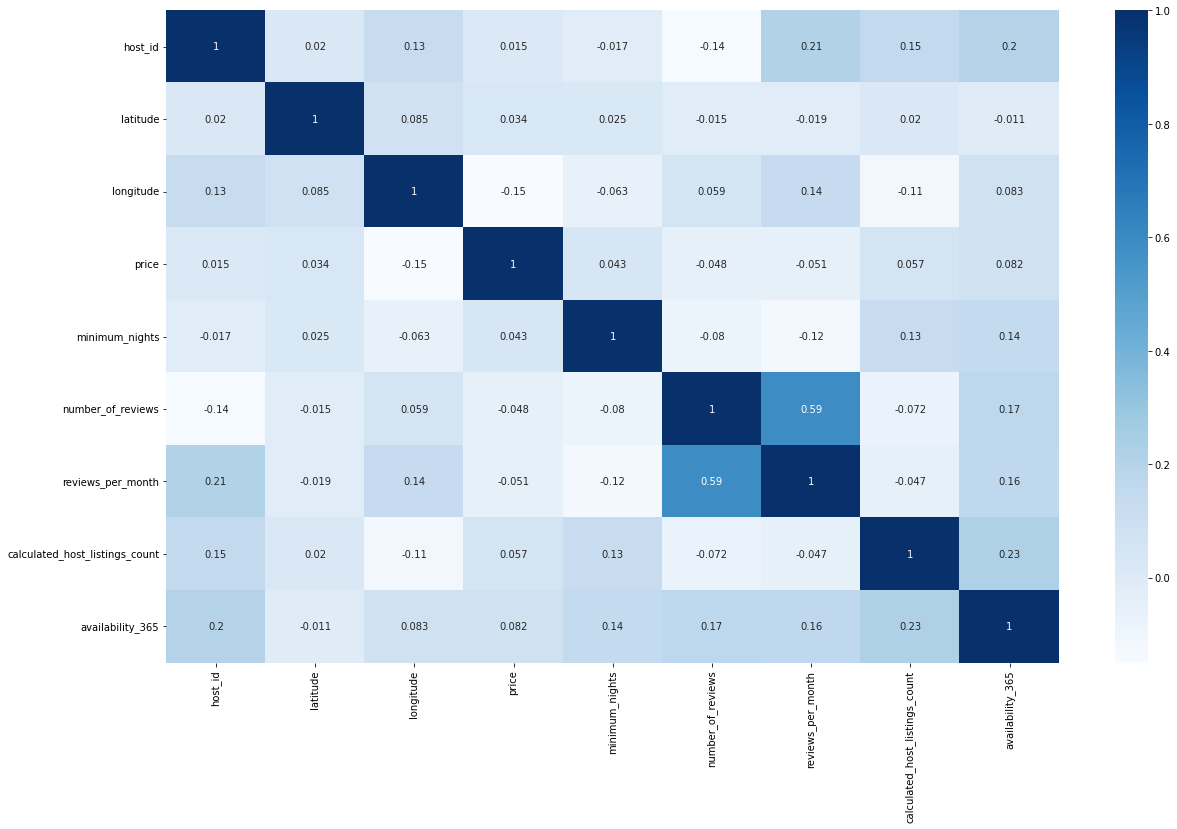

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [29]:
## Correlation between the data
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()
df_corr = df.corr().transpose()
df_corr

Here we see, as expected, that reviews_per_month and number_of_reviews has a strong positive correlation, beside this we couldn't apreciate another strong correlation.
But if we look each case and search for the two highest correlations we find the following information: 
- In the host_id case we see some positive correlation with availability_365 and reviews_per_month.
- In the price case and minimum_nights case we see some positive correlation with calculated_host_listings_count and availability_365.

### But what about the categoricals variables?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


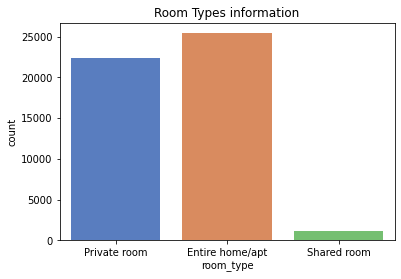

In [30]:
plt.title("Room Types information")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


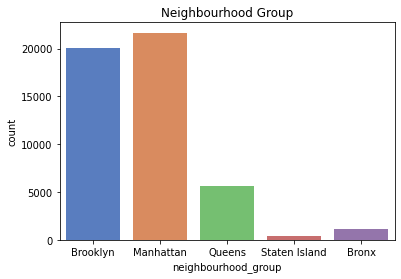

In [31]:
plt.title("Neighbourhood Group")
sns.countplot(df_raw.neighbourhood_group, palette="muted")
fig = plt.gcf()
plt.show()

* Here we see that we can find more listings with room type entire home/apartament and less of the type shared room.
About the neightbourhood group we observe a larger number of listings in Manhattan and Brooklyn, and in the other side a smaller number of listings in Staten Island.

Using the data set information about latitude and longitude we can group by neighbourhood_group and observe in the map the dispersion of the locations.

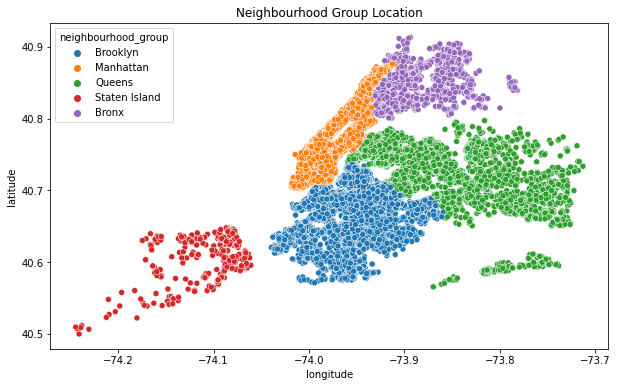

In [32]:
# Using the data set information about latitude and longitude we can group by neighbourhood_group and observe 
# the dispersion of the locations in the map.
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',hue='neighbourhood_group', data=df).set_title(title)
plt.ioff()

### And, how can we relate different variables?

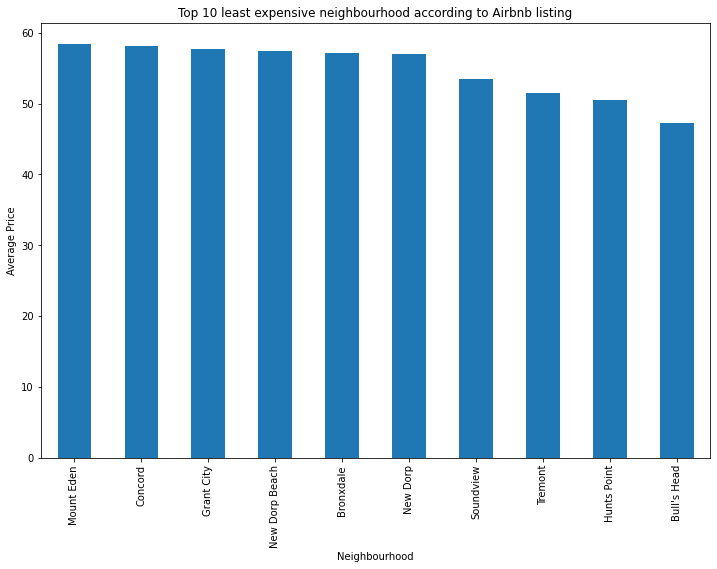

More information:


neighbourhood
Mount Eden        58.500000
Concord           58.192308
Grant City        57.666667
New Dorp Beach    57.400000
Bronxdale         57.105263
New Dorp          57.000000
Soundview         53.466667
Tremont           51.545455
Hunts Point       50.500000
Bull's Head       47.333333
Name: price, dtype: float64

In [33]:
df0 = df.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending=False).tail(10)
df0.plot(kind='bar', figsize=(12,8))
plt.title('Top 10 least expensive neighbourhood according to Airbnb listing')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood')
plt.show()
print("More information:")
df0

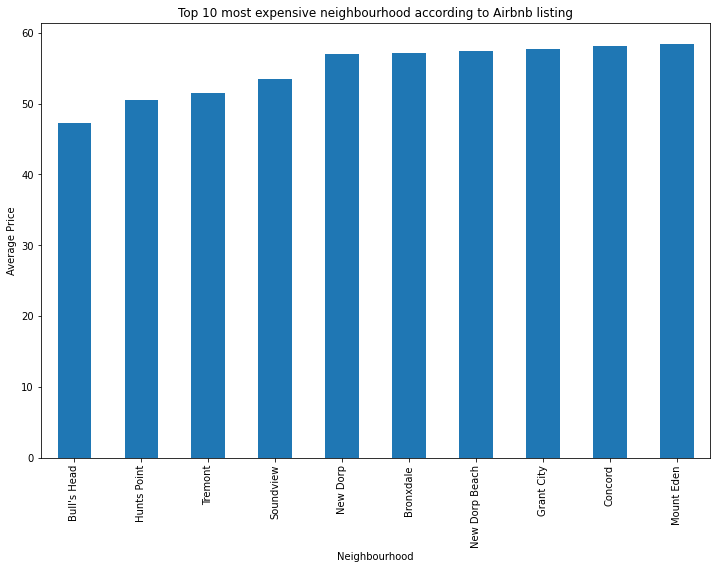

More information:


neighbourhood
Bull's Head       47.333333
Hunts Point       50.500000
Tremont           51.545455
Soundview         53.466667
New Dorp          57.000000
Bronxdale         57.105263
New Dorp Beach    57.400000
Grant City        57.666667
Concord           58.192308
Mount Eden        58.500000
Name: price, dtype: float64

In [34]:
df1 = df.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending=True).head(10)
df1.plot(kind='bar', figsize=(12,8))
plt.title('Top 10 most expensive neighbourhood according to Airbnb listing')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood')
plt.show()
print("More information:")
df1

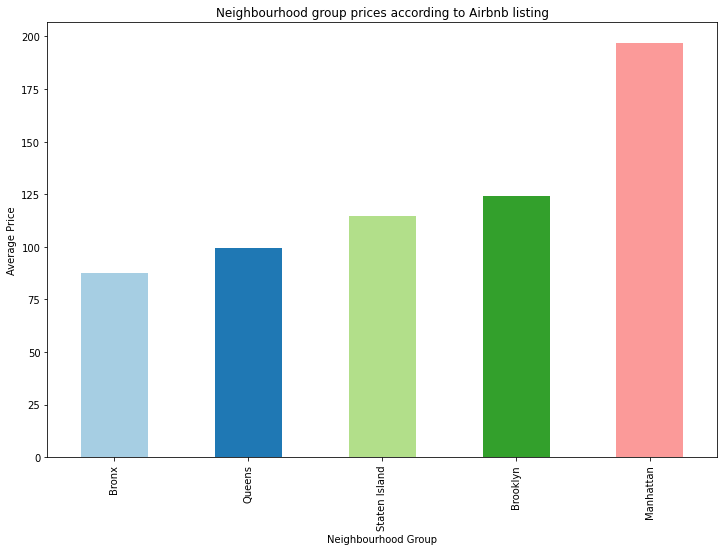

More information:


neighbourhood_group
Bronx             87.496792
Queens            99.517649
Staten Island    114.812332
Brooklyn         124.383207
Manhattan        196.875814
Name: price, dtype: float64

In [35]:
df2 = df.groupby("neighbourhood_group")["price"].agg("mean").sort_values(ascending=True)
df2.plot(kind='bar', figsize=(12,8), color=plt.get_cmap('Paired').colors)
plt.title('Neighbourhood group prices according to Airbnb listing')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print("More information:")
df2

After knowing which are the cheapest and the most expensive neigbourhoods we can search among the neighbourhood groups which room type is more expensive an which room type is more cheap per night.

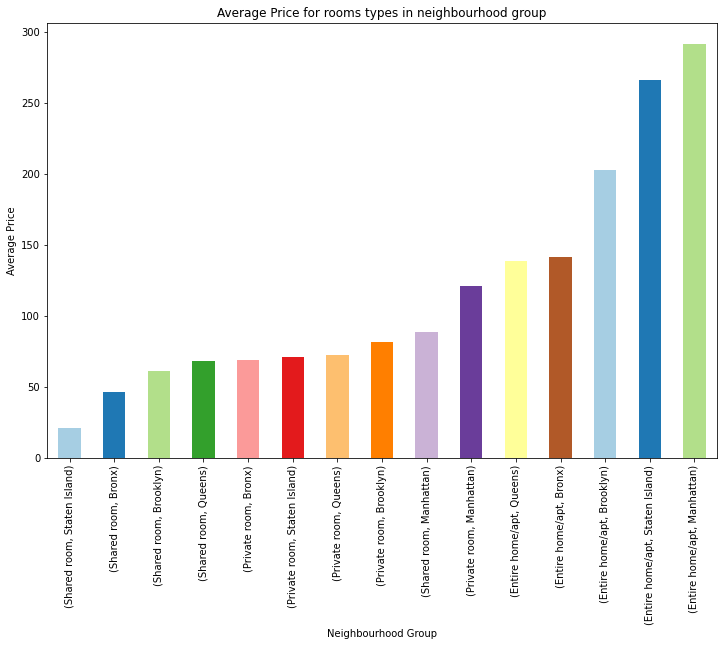

More information:


room_type        neighbourhood_group
Shared room      Staten Island           21.000000
                 Bronx                   46.711111
                 Brooklyn                60.921212
                 Queens                  68.459459
Private room     Bronx                   69.025862
                 Staten Island           71.394366
                 Queens                  72.454958
                 Brooklyn                81.713284
Shared room      Manhattan               88.462898
Private room     Manhattan              121.434183
Entire home/apt  Queens                 139.036260
                 Bronx                  141.541176
                 Brooklyn               202.895245
                 Staten Island          266.205128
                 Manhattan              291.784595
Name: price, dtype: float64

In [36]:
df3 = df[df.minimum_nights == 1].groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df3.plot(kind='bar', figsize=(12,8), color=plt.get_cmap('Paired').colors)
plt.title('Average Price for rooms types in neighbourhood group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print("More information:")
df3

We can see that staying at a entire home/apartment is always an expensive stay than shared room or private rooms for any location.

Shared room at Staten Island is the most cheapest stay and renting a entire home/apartment at Manhattan is the most expensive.

As we see in previous plot Manhattan is the most expensive option, average price for private room and shared rooms are considerably expensive, even the shared rooms are more expensive than other private rooms of the neighbourhood groups. 

Bronx is the most cheapest stay in terms of neighbourhood group comparison in respect to room type.

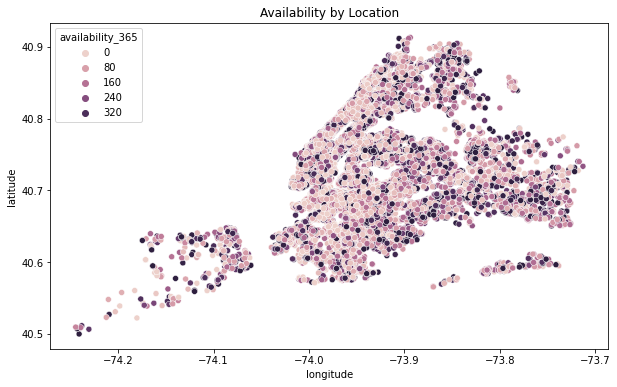

In [37]:
title = 'Availability by Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',hue='availability_365', data=df).set_title(title)
plt.ioff()

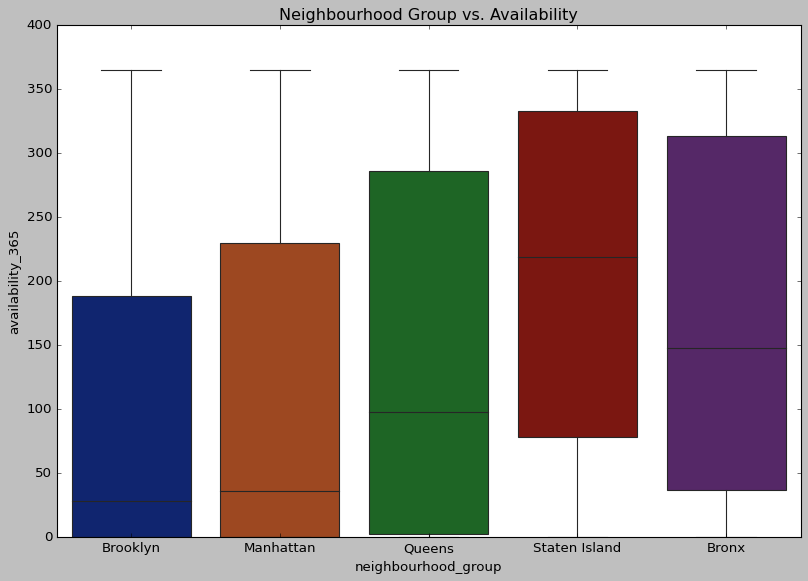

In [38]:
# Avaiability in each neighbourhood group
plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Neighbourhood Group vs. Availability")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

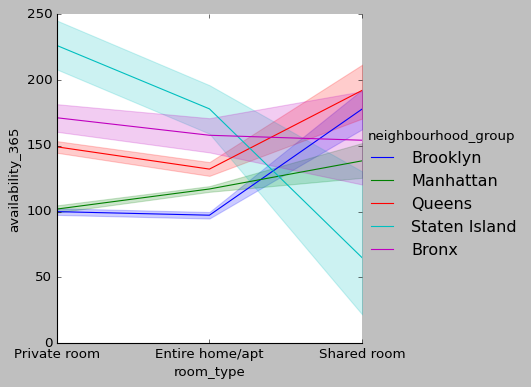

In [39]:
sns.relplot(x= "room_type", y="availability_365", hue="neighbourhood_group", dashes=False, markers=True, kind="line", data=df)

Here we can see that in general Bronx and Staten Island has a better avaiability, and Brooklyn has less avaiability.

If we look at the room types, we can see that shared room at Staten Island has the lowest avaiability, meanwhile Queens has the highest avaiability for this kind of room. As for the entire home/apartment or private room Brooklyn has the lowest avaiability and Staten Island has the highest avaiability.

### And what can we say about the hosts?

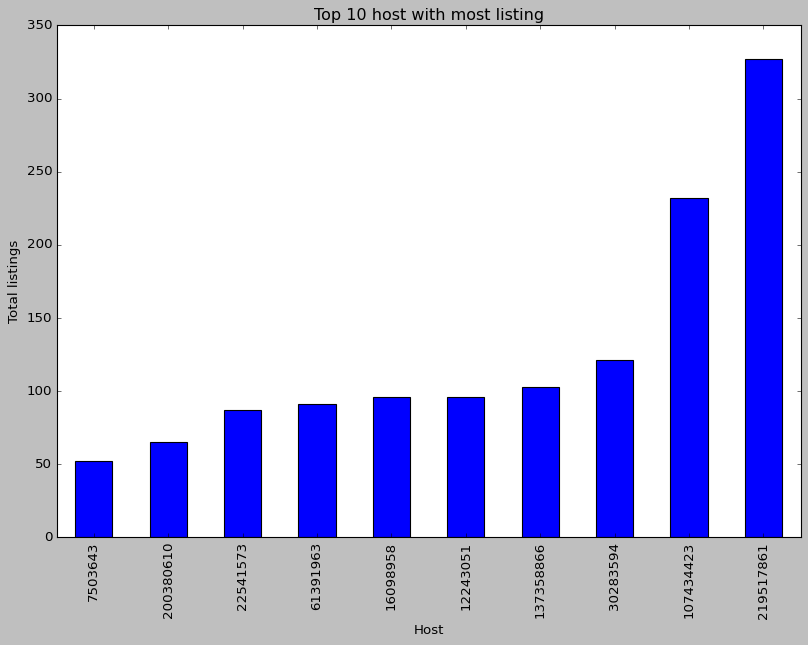

More information:


7503643       52
200380610     65
22541573      87
61391963      91
16098958      96
12243051      96
137358866    103
30283594     121
107434423    232
219517861    327
Name: host_id, dtype: int64

In [40]:
# Let's see what hosts (IDs) have the most listings on Airbnb platform
df4 = df.host_id.value_counts().head(10).sort_values(ascending=True)
df4.plot(kind='bar', figsize=(12,8))
plt.title('Top 10 host with most listing')
plt.ylabel('Total listings')
plt.xlabel('Host')
plt.show()
print("More information:")
df4

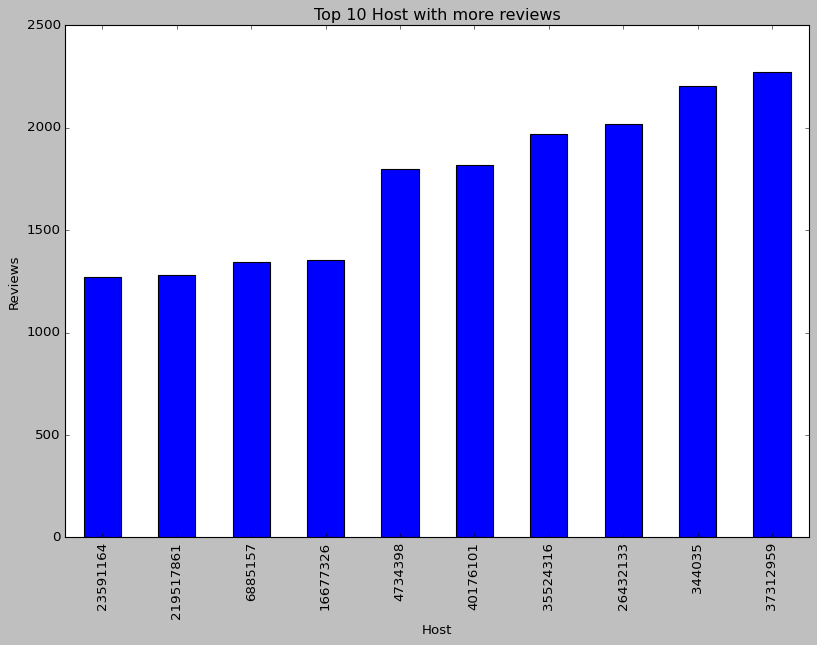

More information:


host_id
23591164     1269
219517861    1281
6885157      1346
16677326     1355
4734398      1798
40176101     1818
35524316     1971
26432133     2017
344035       2205
37312959     2273
Name: number_of_reviews, dtype: int64

In [41]:
# Top 10 host with more reviews
df5 = df.groupby('host_id')['number_of_reviews'].agg('sum').sort_values(ascending=True).tail(10)
df5.plot(kind='bar', figsize=(12,8))
plt.title('Top 10 Host with more reviews')
plt.ylabel('Reviews')
plt.xlabel('Host')
plt.show()
print("More information:")
df5

From the two plots above we observe that only the host with the id 219517861 is one of the host with more listings and more reviews. This lead us to think that more listings doesn't guarantee much about the stay.

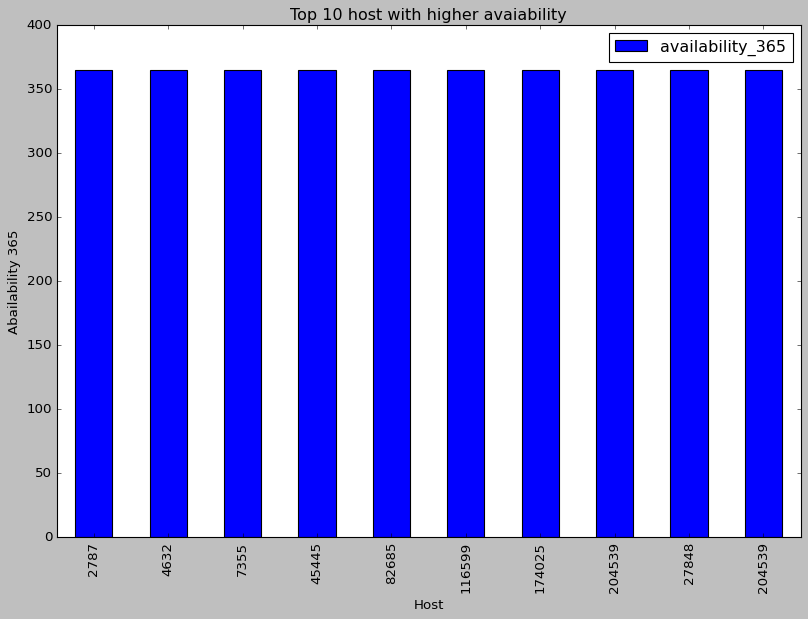

More information:


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.00,1,365
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0.00,1,365
97,82685,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,0.11,1,365
139,116599,Brooklyn,Clinton Hill,40.68630,-73.96765,Private room,135,4,84,0.77,3,365
164,174025,Manhattan,Upper East Side,40.76123,-73.96420,Entire home/apt,250,3,4,0.08,1,365
181,204539,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365
196,27848,Queens,Jamaica,40.67252,-73.76597,Private room,55,2,52,0.49,2,365
200,204539,Queens,Ridgewood,40.70234,-73.89816,Private room,140,7,6,0.06,5,365


In [42]:
df6=df.nlargest(10,'availability_365').sort_values(by='availability_365',ascending=True)
df6.plot(kind='bar', x='host_id', y='availability_365', figsize=(12,8))
plt.title('Top 10 host with higher avaiability')
plt.ylabel('Abailability 365')
plt.xlabel('Host')
plt.show()
print("More information:")
df6

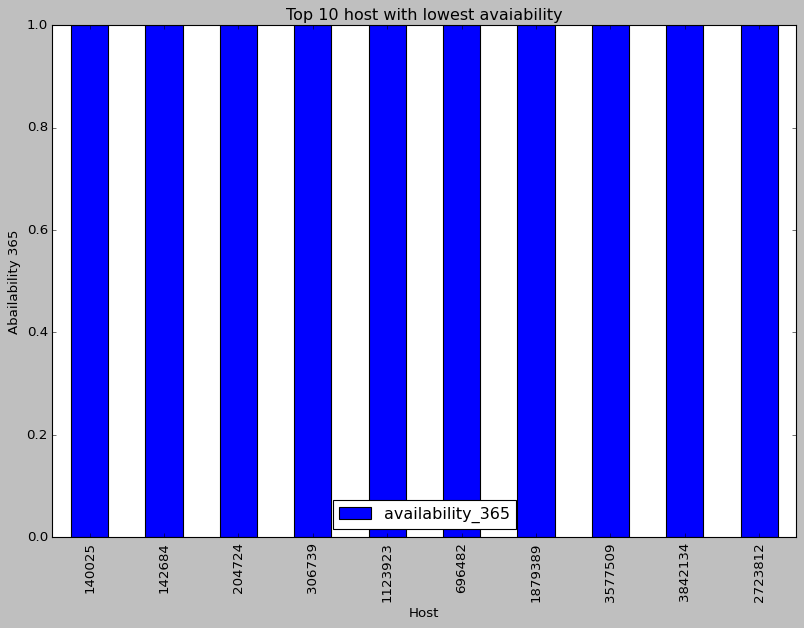

More information:


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
143,140025,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,0.01,1,1
152,142684,Brooklyn,Williamsburg,40.71536,-73.96057,Private room,125,3,155,1.61,1,1
183,204724,Brooklyn,Williamsburg,40.71627,-73.95870,Entire home/apt,200,4,33,0.58,1,1
564,306739,Brooklyn,Greenpoint,40.73049,-73.96115,Entire home/apt,185,3,228,2.39,3,1
694,1123923,Brooklyn,Cypress Hills,40.67855,-73.88960,Private room,48,90,53,0.57,2,1
707,696482,Brooklyn,Bedford-Stuyvesant,40.68338,-73.95289,Entire home/apt,130,3,18,0.25,1,1
1262,1879389,Brooklyn,Williamsburg,40.71872,-73.96042,Entire home/apt,189,4,33,0.44,2,1
1540,3577509,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
1618,3842134,Brooklyn,Greenpoint,40.72661,-73.94586,Private room,52,5,35,0.44,3,1
1724,2723812,Bronx,Port Morris,40.80461,-73.92276,Private room,60,3,86,1.13,2,1


In [43]:
df7=df[df['availability_365']>0].nsmallest(10,'availability_365').sort_values(by='availability_365',ascending=False)
df7.plot(kind='bar', x='host_id', y='availability_365', figsize=(12,8))
plt.title('Top 10 host with lowest avaiability')
plt.ylabel('Abailability 365')
plt.xlabel('Host')
plt.show()
print("More information:")
df7

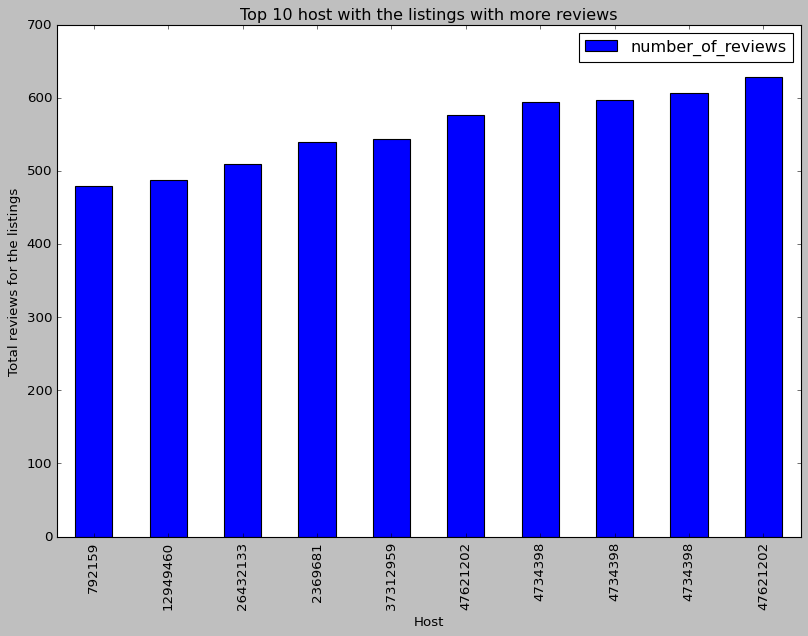

More information:


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333


In [44]:
# Top listing with more reviews
df8=df.nlargest(10,'number_of_reviews').sort_values(by='number_of_reviews',ascending=True)
df8.plot(kind='bar', x='host_id', y='number_of_reviews', figsize=(12,8))
plt.title('Top 10 host with the listings with more reviews')
plt.ylabel('Total reviews for the listings')
plt.xlabel('Host')
plt.show()
print("More information:")
df8

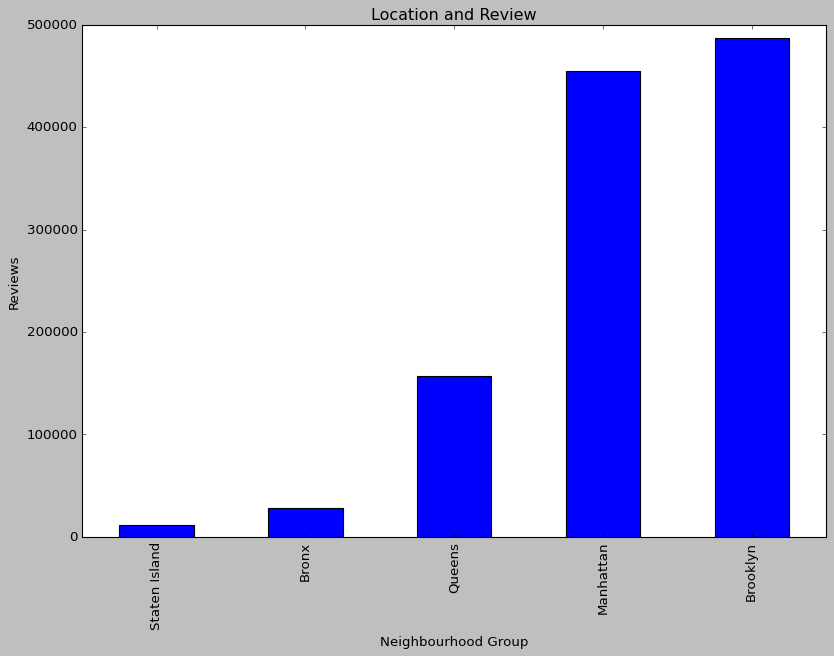

More information:


neighbourhood_group
Staten Island     11541
Bronx             28371
Queens           156950
Manhattan        454569
Brooklyn         486574
Name: number_of_reviews, dtype: int64

In [45]:
# Neighbourhood Group and Review Score
df9 = df.groupby('neighbourhood_group')['number_of_reviews'].agg('sum').sort_values(ascending=True).tail(10)
df9.plot(kind='bar', figsize=(12,8))
plt.title('Location and Review')
plt.ylabel('Reviews')
plt.xlabel('Neighbourhood Group')
plt.show()
print("More information:")
df9

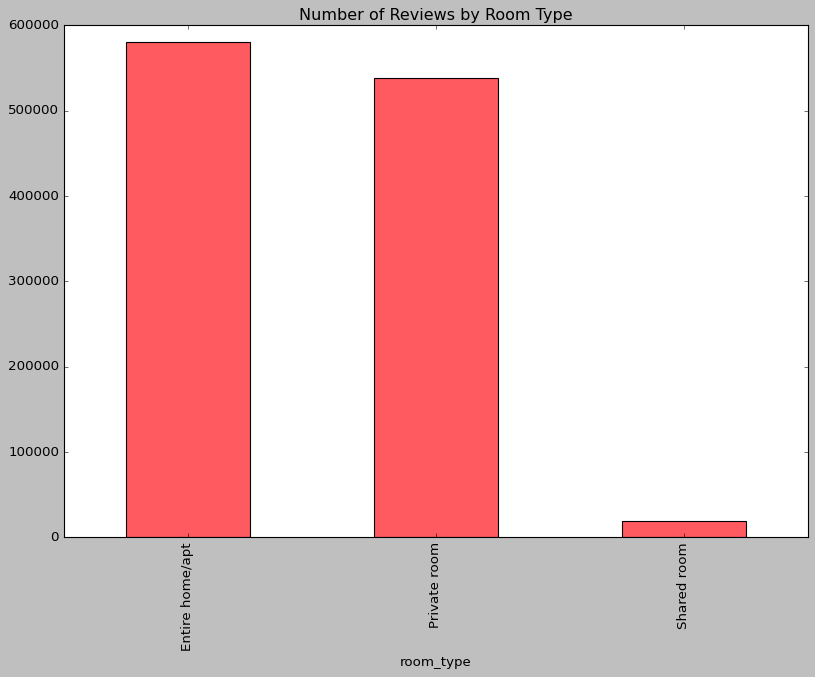

More information:


room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [46]:
# Reviews per room type
df10 = df.groupby('room_type')['number_of_reviews'].agg('sum')
df10.plot(kind = 'bar', title = 'Number of Reviews by Room Type',figsize=(12,8), color = '#FF5A5F')
plt.show()
print("More information:")
df10

Here we observe that the two neighbourhood group with more reviews are Brooklyn and Manhattan, and the neighbourhood group with least reviews is Staten Island.
As about the the room types entire home/apartments has the most reviews and shared room the fewest.

## Summarizing the observations obtained from the plots:
The most properties are in Manhattan and Staten Island has the fewest, but in te other hand Manhattan has the lowest availability_365 and Staten Island has the highest availability_365. 

As for the stay, if we wanted to know more about the listings and search for reviews we have the most reviews in Brooklyn and Manhattan and the fewer in Staten Island.

As for the average price, the most expensive stays are in Manhattan and the cheapest are in Bronx, Queens or Staten Island. 

As for the room types, the higher amount are entire home/apartment and the fewer are shared rooms. Regarding to the average price always it is more expensive for any location to stay in entire home/apartment, this type of room has the most reviews and the lowest availability_365. The cheapest option for a stay is shared rooms, except in Manhattan wich are more expensive than any private room in the other locations. Also, shared rooms have the lowest amount of reviews and the highest availabilities, the exception is Staten Island that has the lowest availability for this type of room.